## Convergence of finite difference formulation of high order convected scheme

We examine test cases of 1D0V advection (i.e. 1D in configuration, and "0-dimensional" in velocity as the velocity is chosen and is not a phase space variable). That is, we solve

$$\frac{\partial f}{\partial t} + v\frac{\partial f}{\partial x} = 0$$

for the domain $x\in [-0.5, 1.5]$, $t\in [0, 1.0]$, and the velocity $v$ is to be chosen. The exact solution at any time $t$ is given by $f(t,x) = f(0, x - vt)$ for any sign of $v$.

For the convergence analysis of high order CS, we use an asymmetric, infinitely differentiable function for an initial condition that is the superposition of three Gaussian bells:

$$f(t = 0, x) \equiv f_0(x) = \tfrac{3}{4} \exp(-\left(\tfrac{x + 0.25}{0.03}\right)^2) + \exp(-\left(\tfrac{x}{0.06}\right)^2) + \tfrac{1}{2}\exp(-(\tfrac{x - 0.25}{0.1}^2)$$ 

Writing $a = 3/4, c = 1/2, w_a = 0.03, w_b = 0.06, w_c = 0.1, x_a = 0.25, x_c = -0.25$, the above is equivalent to

$$f_0(x) = a\exp\left[(-\left(\frac{x + x_a}{w_a}\right)^2\right] + \exp\left[-\left(\frac{x}{w_b}\right)^2\right] + c\exp\left[-(\frac{x + x_c}{w_c})^2\right]$$ 

The first few derivatives are given by:

<u>first derivative</u>
\begin{eqnarray*}
f^{(1)}_0(x) & = & a\left(-\frac{2}{w_a^2}\right)(x + x_a)\exp\left[-\left(\frac{x + x_a}{w_a}\right)^2\right] \\[1em]
& & \left(-\frac{2}{w_b^2}\right)x\exp\left[-\left(\frac{x}{w_b}\right)^2\right]\\[1em]
& & c\left(-\frac{2}{w_c^2}\right)(x + x_c)\exp\left[-\left(\frac{x + x_c}{w_c}\right)^2\right]
\end{eqnarray*}

<u>second derivative</u>
\begin{eqnarray*}
f^{(2)}_0(x) & = & a\left(-\frac{2}{w_a^2}\right)\left[1 - \frac{2}{w_a^2}(x + x_a)^2\right]\exp\left[-\left(\frac{x + x_a}{w_a}\right)^2\right] \\
& & \left(-\frac{2}{w_b^2}\right)\left[1 - \frac{2}{w_b^2}x^2\right]\exp\left[-\left(\frac{x}{w_b}\right)^2\right] \\
& & c\left(-\frac{2}{w_c^2}\right)\left[1 - \frac{2}{w_c^2}(x + x_c)^2\right]\exp\left[-\left(\frac{x + x_c}{w_c}\right)^2\right] \\
\end{eqnarray*}

<u>third derivative</u>
\begin{eqnarray*}
f^{(3)}_0(x) & = & a\left(-\frac{2}{w_a^2}\right)^2\left[3(x + x_a) - \frac{2}{w_a^2}(x + x_a)^3\right]\exp\left[-\left(\frac{x + x_a}{w_a}\right)^2\right] \\[1em]
& & \left(-\frac{2}{w_b^2}\right)^2\left[3x - \frac{2}{w_b^2}x^3\right]\exp\left[-\left(\frac{x}{w_b}\right)^2\right] \\[1em]
& & c\left(-\frac{2}{w_c^2}\right)^2\left[3(x + x_c) - \frac{2}{w_c^2}(x + x_c)^3\right]\exp\left[-\left(\frac{x + x_c}{w_c}\right)^2\right]
\end{eqnarray*}


<u>fourth derivative</u>

\begin{eqnarray*}
f^{(4)}_0(x) & = & a\left(-\frac{2}{w_a^2}\right)^2\left[3 + 6\left(-\frac{2}{w_a^2}\right)(x + x_a)^2 + \left(-\frac{2}{w_a^2}\right)^2(x + x_a)^4\right]\exp\left[-\left(\frac{x + x_a}{w_a}\right)^2\right] \\[1em]
& & \left(-\frac{2}{w_b^2}\right)^2\left[3 + 6\left(-\frac{2}{w_b^2}\right)x^2 + \left(-\frac{2}{w_b^2}\right)^2x^4\right]\exp\left[-\left(\frac{x}{w_c}\right)^2\right] \\[1em]
& & c\left(-\frac{2}{w_c^2}\right)^2\left[3 + 6\left(-\frac{2}{w_a^2}\right)(x + x_c)^2 + \left(-\frac{2}{w_c^2}\right)(x + x_c)^4\right]\exp\left[-\left(\frac{x + x_c}{w_c}\right)^2\right]
\end{eqnarray*}

The idea behind the construction of such a function for the test case is that it has sufficient variability on both longer and shorter wavelengths so that higher order solvers might be able to show visually (as well as by the numbers) that it produces more accurate as compared to lower order solvers of the same kind.

## Convergence of matrix finite difference formulation of derivative

We first analyze the function in centered position given above, and is repeated here for convenience:

$$f_0(x) = a\exp\left[(-\left(\frac{x + x_a}{w_a}\right)^2\right] + \exp\left[-\left(\frac{x}{w_b}\right)^2\right] + c\exp\left[-(\frac{x + x_c}{w_c})^2\right]$$ 

for  $a = 3/4, c = 1/2, w_a = 0.03, w_b = 0.06, w_c = 0.1, x_a = 0.25, x_c = -0.25$

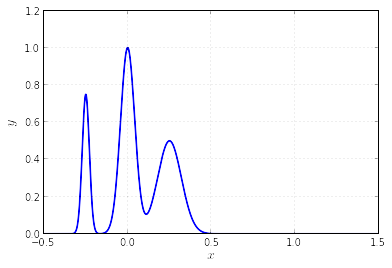

In [1]:
%matplotlib inline
%reload_ext autoreload 
%autoreload 2 
import numpy as np
import matplotlib.pyplot as plt


a, c = 3/4., 1/2.
w_a, w_b, w_c = 0.03, 0.06, 0.1
x_a, x_c = 0.25, -0.25

ax, bx = -0.5, 1.5
x = np.linspace(ax, bx,1000)
f = a * np.exp(-((x + x_a) / w_a) ** 2) + np.exp(-((x/w_b)**2)) + c*np.exp(-((x + x_c)/w_c) ** 2)
                                                 
plt.plot(x,f,'-b', linewidth = 2)
plt.grid()
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)

The normalized derivatives are plotted alongside the initial density below, where we also limit the plot window to only show the nonzero regions.

In [2]:
cd pyfiles/

/home/dsirajud/Work/IPython-notebooks/Convergence of FD formulation of high order CS/pyfiles


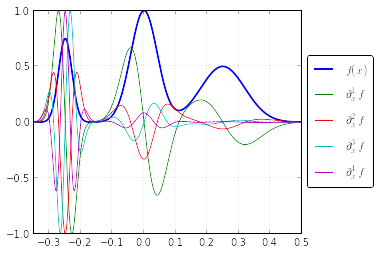

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import convergence_routines

ax = -0.5
bx = 1.5
L = bx - ax
Nx = 1000
dx = L / Nx

x = np.zeros(Nx)

for i in range(Nx):
    x[i] = ax + i*dx

f =  convergence_routines.function(x)

df1 = convergence_routines.df1(x)
df2 = convergence_routines.df2(x)
df3 = convergence_routines.df3(x)
df4 = convergence_routines.df4(x)

fig, ax = plt.figure(), plt.subplot(111)

ax.plot(x,f, linewidth = 2, label = '$f(x)$')
ax.hold('on')

nmax = 4
for n in range(1,nmax + 1):
    df_str = 'df' + str(n)
    minimum = np.min(eval(df_str))
    maximum = np.max(eval(df_str))

    if np.abs(minimum) >= np.abs(maximum):
        absmax = np.abs(minimum)
    else:
        absmax = np.abs(maximum)

    ax.plot(x,eval(df_str) / absmax, linewidth = 1, linestyle = '-', label = r'$\partial_x^{%i} f$' % n )

ax.hold('off')
frame = ax.get_position() # position of plot center

# shrink frame of the plot to make room for a legend on the right side
ax.set_position([frame.x0, frame.y0,
                 frame.width * 0.8, frame.height])

# Place legend to the right of the shrunken frame
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          fancybox=True, ncol=1)

plt.xlim([-0.35,0.5])
plt.ylim([-1.0,1.0])
plt.grid()

Note that the higher the order of the derivatives, the larger in size the extrema become, for example, we show the absolute maxima for the above four derivatives for comparsion (recall it is the normalized derivatives that are plotted just above)

In [21]:
nmax = 4
for n in range(1,nmax + 1):
    df_str = 'df' + str(n)
    minimum = np.min(eval(df_str))
    maximum = np.max(eval(df_str))

    if np.abs(minimum) >= np.abs(maximum):
        absmax = np.abs(minimum)
    else:
        absmax = np.abs(maximum)
        
    print 'df' + str(n) + ' absmax = %g' % absmax

df1 absmax = 21.415


TypeError: bad operand type for abs(): 'function'

We analyze the convergence of the first four derivatives to get a sense of how fine a mesh is permissible for each derivative, but recalling from high order CS, we need each order derivative to be of order $O(\Delta x^{N+1-\ell}), \ell = 1, 2, \ldots$

In [13]:
cd bin/

/home/dsirajud/Work/IPython-notebooks/Convergence of FD formulation of high order CS/pyfiles/bin


In [14]:
import generate_tables_of_finite_difference_schemes_for_a_given_LTE_for_range_of_derivatives

generate_tables_of_finite_difference_schemes_for_a_given_LTE_for_range_of_derivatives.main(LTE = 3, dn_min = 1, dn_max = 5)

In [15]:
cd ..

/home/dsirajud/Work/IPython-notebooks/Convergence of FD formulation of high order CS/pyfiles


derivative dn = 1: 

slope of a linear fit = 2.67059 

order calculations at each refinement step:
Nx21        error = 4.4494       ----
Nx42        error = 3.84225       order = 0.211659
Nx84        error = 0.992643       order = 1.9526
Nx168        error = 0.163587       order = 2.60121
Nx336        error = 0.0223381       order = 2.87249
Nx672        error = 0.00285612       order = 2.96738
Nx1344        error = 0.000359051       order = 2.9918
Nx2688        error = 4.49453e-05       order = 2.99795
Nx5376        error = 5.62016e-06       order = 2.99949
Nx10752        error = 7.02583e-07       order = 2.99987


derivative dn = 2: 

slope of a linear fit = 3.49164 

order calculations at each refinement step:
Nx21        error = 186.714       ----
Nx42        error = 108.342       order = 0.785237
Nx84        error = 18.5359       order = 2.5472
Nx168        error = 2.69061       order = 2.78432
Nx336        error = 0.191804       order = 3.81023
Nx672        error = 0.0124011      

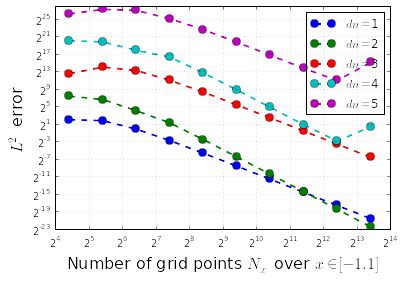

In [16]:
%matplotlib inline
import convergence_routines

convergence_routines.convergence_for_several_derivatives_at_const_LTE(NumGrids = 10, _LTE = 3, _dn_min = 1,
                                                                      _dn_max = 5)


As usual, for schemes that have an odd stencil (size = LTE + dn, e.g. dn = 2, 4), we anticipate a higher order of accuracy since the existence of a central schemes in odd stencils furnishes a fortuitous cancellation of exactly one extra term in the LTE, raising its order of accuracy. Since the most centered scheme is used for the majority of the domain (internal nodes, away from edges), the observed order is closer to this $N+1$ convergence than to the bottom line of $N$ that was queried in the script run for the FD generation scheme. For the other derivatives (dn = 1, 3), we expect order $O(\Delta x^3)$. All of these are observed, and we do note that for dn = 4, we observe a trend that was observed in the notebook "Convergence of FD calculations of derivatives", i.e. there exist optimal ranges for mesh resolution, beyond such a threshold a term that scales with the derivative $O(\Delta x^{-dn})$ and is proportional to the machine error $\epsilon \sim 10^{-16}$ can compete with the decreasing LTE term, and dominates. Such a region causes a deviation, as previously investigated, from convergence, and generally a mesh this refined with respect to a particular derivative should be avoided to preclude numerical error from contaminating the global solution; however, it is clear that the ultimate bottom line is not convergence of the derivatives, but to ensure we do not operate in a region where the error is not agreeable. That is, we may choose a mesh that dips into the region with positive slope on the above plot ($L^2$ error vs. mesh), and while these can be regarded as troubled waters, so long as the error is still quite small we do not incur any consequences. To that end, we note that this knowledge for a particular problem with an evolving density function cannot be predicted a priori, and make note that should inconsistencies be present, the "corrections" added to final position of a moving cell in CS (which come from higher order derivatives) can be a culprit.

<font color = "red">Recalling the findings of the previous notebook "Convergence of FD calculations of derivatives", the ranges of mesh sizes that allow for convergence of the derivatives gets smaller the higher order the derivative number is. Thus, <b>we anticipate the current finding that CS cannot converge for higher order beyond 10 is a direct consequence of there failing to exist a range of mesh spacings that consecutively (upon mesh refinement) have convergence for all such derivatives</b>, and numerical error terms contaminate the result causing finer meshes to fail to give better results and are unable to demonstrate overall convergence in CS to higher orders</font>

<font color = "blue">examining the convergence of derivatives up to order 11 should suffice as proof that this idea is correct</font>

Examining the exact derivatives alongside the approximations from the FD schemes:

In [ ]:
%matplotlib inline
from convergence_routines import FD_derivative_matrix_formulation, domain, df1

x, dx, L = domain(_Nx = 1344) # Nx = 1344 shows convergent FD derivative from above output
L2error, df1_approx = FD_derivative_matrix_formulation(_dn = 1, _p = 3, _Nx = 1344)
df1_exact = df1(x)

plt.plot(x,df1_exact, label = 'exact df1', marker = 'o', linewidth = 2)
plt.hold('on')
plt.plot(x,df1_approx, label = 'approx df1', linewidth = 2)
plt.hold('off')

plt.legend(loc = 'best')
plt.grid()

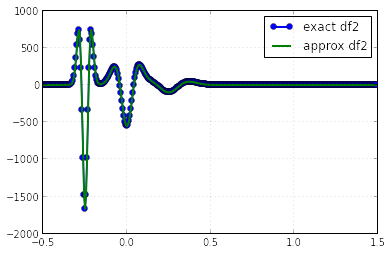

In [9]:
%matplotlib inline
from convergence_routines import FD_derivative_matrix_formulation, domain, df2

x, dx, L = domain(_Nx = 336) # Nx = 336 shows convergent FD derivative from above output
L2error, df2_approx = FD_derivative_matrix_formulation(_dn = 2, _p = 3, _Nx = 336)
df2_exact = df2(x)

plt.plot(x,df2_exact, label = 'exact df2', marker = 'o', linewidth = 2)
plt.hold('on')
plt.plot(x,df2_approx, label = 'approx df2', linewidth = 2)
plt.hold('off')

plt.legend(loc = 'best')
plt.grid()

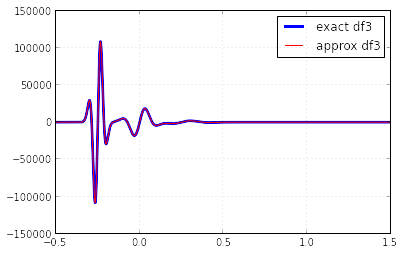

In [10]:
%matplotlib inline
from convergence_routines import FD_derivative_matrix_formulation, domain, df3

x, dx, L = domain(_Nx = 2688) # Nx = 2688 shows not convergence, but a saturated error
L2error, df3_approx = FD_derivative_matrix_formulation(_dn = 3, _p = 3, _Nx = 2688)
df3_exact = df3(x)

plt.plot(x,df3_exact, label = 'exact df3', linewidth = 3)
plt.hold('on')
plt.plot(x,df3_approx, label = 'approx df3', linewidth = 1, color = "red")
plt.hold('off')

plt.legend(loc = 'best')
plt.grid()

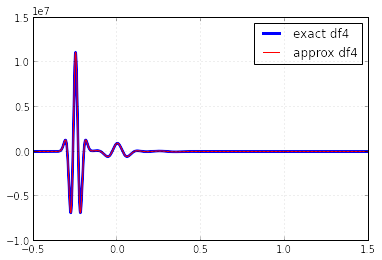

In [11]:
%matplotlib inline
from convergence_routines import FD_derivative_matrix_formulation, domain, df4

x, dx, L = domain(_Nx = 2688) # Nx = 2688 shows not convergence, but a saturated error
L2error, df4_approx = FD_derivative_matrix_formulation(_dn = 4, _p = 3, _Nx = 2688)
df4_exact = df4(x)

plt.plot(x,df4_exact, label = 'exact df4', linewidth = 3)
plt.hold('on')
plt.plot(x,df4_approx, label = 'approx df4', linewidth = 1, color = "red")
plt.hold('off')

plt.legend(loc = 'best')
plt.grid()

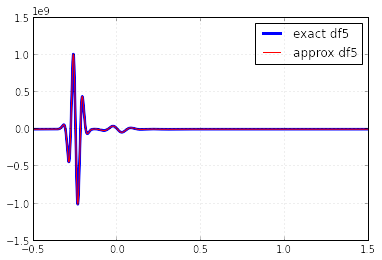

In [17]:
%matplotlib inline
from convergence_routines import FD_derivative_matrix_formulation, domain, df5

x, dx, L = domain(_Nx = 2688) # Nx = 2688 shows not convergence, but a saturated error
L2error, df5_approx = FD_derivative_matrix_formulation(_dn = 5, _p = 3, _Nx = 2688)
df5_exact = df5(x)

plt.plot(x,df5_exact, label = 'exact df5', linewidth = 3)
plt.hold('on')
plt.plot(x,df5_approx, label = 'approx df5', linewidth = 1, color = "red")
plt.hold('off')

plt.legend(loc = 'best')
plt.grid()

The differences are quite large when regarding the actual scale of this derivative, we zoom in to emphasize that there is more than meets the eye here

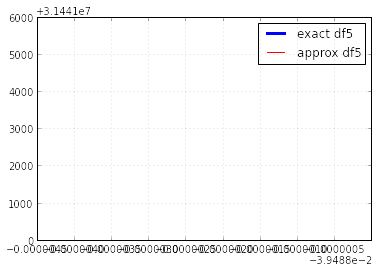

In [19]:
%matplotlib inline

plt.plot(x,df5_exact, label = 'exact df5', linewidth = 3)
plt.hold('on')
plt.plot(x,df5_approx, label = 'approx df5', linewidth = 1, color = "red")
plt.hold('off')

plt.legend(loc = 'best')
plt.ylim([1000 + 3.144e7, 7000 + 3.144e7])
plt.xlim([-0.0000035-3.9489e-2, 0.0000010-3.9489e-2])
plt.xlim
plt.grid()

## Review of high order convected scheme (CS) [brief]

In order to correct the numerical solution $f_{CS}(t^{n+1},x_i) = f_{i,CS}^{n+1} \equiv f_i^{n+1}$ at a given time step (cf. prelim document), we require adding contributions from all such high order pre-fluxes $[Uf]_{i'}^{n}$ transmitted from prepoints $\{i'\}$ that reach within a cell distance $\Delta x$ of a point $i$ (which the author enjoys referring to as pre-efflux -> 'preffluxes' (/preˈfləks/) so that a portion of the density packet is appropriated to the cell center $i$. Following this prescription produces the approximate CS solution: at a time $t^{n+1}$

$$f_{exact}(t^{n+1},x_i) = f_i^{n+1} + O(\Delta x^{N+1})$$

where the local truncation error (LTE) is $O(\Delta x^{N+1})$, and corresponding global error (GE) at the end of simulation as $O(\Delta x^N)$. If convected scheme is employed in its raw form, its local truncation error is $O(\Delta x^2)$. A means of achieving higher order of local truncation error is provided by considering the CS update statement at a position $i$ at the time $t^{n+1}$ as contributions from all such locations that are convected from prepoint cells ($\{k\}$ or $\{i'\}$ equipped with velocities $\{v_k\}$ and $\{v_{i'}\}$) to within a cell spacing of the center $i$ (fractions of the density packets are allocated to all contiguous cells from its exact postpoint location). There is no error in pushing density packets an integral number of cells, hence the only source of error in convected scheme that can be corrected to higher order comes from the remap assignment involving the fractional CFL number $\alpha = \text{CFL} - \text{frac}[v\Delta t / \Delta x]$ which we refer to as the corrected fraction $U$ defined such that $U = \alpha + O(\Delta x^{N+1})$ to higher order whose form is to be seeked. For the asserted uniform density profile for each packet, we have the general total update statement where the integer push from the $\text{CFL}$ number pushes prepoints $\{k, i'\}$ to within one cell spacing of the grid point $i$ (either to $i$ or to $i \pm 1$), and the signed fractional component in the partition of the CFL number, $\alpha$ (or $U$) is defined with a convention such that this fractional (normalized) distance $U$ is such that it will not push a packet at a location $\{i, i\pm 1\}$ outside of one cell spacing $\Delta x$ of the grid center $i$. In high order CS, 

$$f_i^{n+1} = \pm \sum_{k: k\to i\mp1}U_{k}^n f_{k}^n + \sum_{i' : i'\to i} (1 \mp U_{i'}^n) f_{i'}^n$$

where $U_{\ell},\, (\ell = i', k)$ labels the originating grid point's fractional CFL number (in classical CS, we swap $U$ with $\alpha$). If $v > 0\, (U > 0)$, choosing the top sign produces the appropriate update statement, and vice versa. The above is an update statement for all cells with arbitrary velocities ($\partial_t f + v(t,x) \partial_x f = 0$). Alternatively, each cell can be viewed to solve its own 1D constant speed advection equation ($\partial_t f_{\ell} + v_{\ell}\partial_x f_{\ell} = 0$) where $f_{\ell}$ a density function for all $x$ with compact support that is only nonzero at the cell $x_{\ell} \pm \Delta x$, and thus the total solution is the assembly of each solution for each density packet $\ell$, i.e. 

$$\sum_{\ell} \partial_t f_{\ell} + v_{\ell}\partial_x f_{\ell} = 0 \rightarrow \partial_t f + v(t,x) \partial_x f = 0,$$ 

which follows from our partition $\sum_{\ell} f_{\ell} = f$. Thus, rather than viewing the update as a sum over all cells that are advected to contiguous cells of a cell center of interest $i$, we can consider one cell at a time for an incremental update and discern a relevant correction for the one-cell update which can be combined with corrected one-cell updates for all cells to assemble the total solution. Equivalently, we can always identify pairs of cells that map to contiguous cells (even if one maps zeros, so there is not conflict with an odd number of gridpoints). Choosing to pursue this option allows for some convenient cancellation of terms that are not transparent in the one-cell update statement so we elect to analyze one such pair $\{k,i'\}$ so that the above total statement collapses to the simple statement:

$$f_i^{n+1} = \pm U_{i \mp 1}^n f_{i \mp 1}^n + (1 \mp U_i^n) f_i^n$$

Thus, correcting this update for one pair to higher order permits us to correct the total solution by summing over all pairs. To that end, we assert the density at $(t^n, x_i)$ is known exactly, i.e. $f_i^n = f_{exact}(t^n,x_i) \equiv f(t,x)$. Labeling this time and position without sub/superscripts to emphasize it is analytically exact, we expand the above to obtain:

$$f^{n+1}_{i} =  f(t,x) + \sum_{p = 1}^{N}\frac{(\mp\Delta x)^p}{p!}\frac{\partial^p(Uf)}{\partial x^p}\biggr|_{(t,x)} + \mathcal{O}(\Delta x^{N+1}) \qquad \qquad \text{(*)}$$

where again, choosing the top sign corresponds to $v > 0 \, (U > 0)$. The (normalized) flux $[Uf]$ is modelled as a power series with to be determined coefficient functions $\beta_q = \beta_q(\alpha )$ which after much algebra can be shown to be recorded as the following:

$$[Uf]_{i'}^n = \sum_{q = 0}^{N-1} c_q d^n_{i,q}$$

where,

$$c_q = (-1)^q\beta_q(\alpha )$$

$$d_{i,q}^n = (\Delta x)^q \frac{\partial^q f^n}{\partial x^q}$$

so that,

$$[Uf]_{i'}^n \sim \sum_{q = 0}^{N-1}(\Delta x)^q \frac{\partial^q f^n}{\partial x^q}$$

Comparing the above formulation for the flux $[Uf]$ and eq. $\text{(*)}$, 

$$f^{n+1}_{i} \sim f(t,x) + \frac{(\mp\Delta x)^1}{1!}\frac{\partial^1}{\partial x^1}\left(f(t,x) + \sum_{q = 1}^{N-1}(\Delta x)^q \frac{\partial^q f^n}{\partial x^q} \right) + \frac{(\mp\Delta x)^2}{2!}\frac{\partial^2}{\partial x^2}\left(f(t,x) + \sum_{q = 1}^{N-1}(\Delta x)^q \frac{\partial^q f^n}{\partial x^q} \right)  + \ldots + \frac{(\mp\Delta x)^N}{N!}\frac{\partial^N}{\partial x^N}\left(f(t,x) + \sum_{q = 1}^{N-1}(\Delta x)^q \frac{\partial^q f^n}{\partial x^q} \right) + \mathcal{O}(\Delta x^{N+1})$$



it is clear that the ultimate criteria that needs to be met so that the CS solution for the density $f$ is accurate with a local truncation error of $O(\Delta x^{N+1}$ is that this sum over $p$ and $q$ has each term to have an LTE of $O(\Delta x^{N+1}$. Since the outer sum over $p\in \mathbb{N}_1^N$ multiplies each series over $q$ (the flux expansion $[Uf]$) by at least $p = 1$, $(\Delta x)^1$, this reduces the restriction on the accuracy by exactly one, so that each flux $[Uf]$ must have an LTE of $O(\Delta x^N)$, which is guaranteed then to be of order $O(\Delta x^{N+1})$ overall. 

Thus, we have the requirement

$$\text{LTE}[d_{i,\ell}^n]_{\ell\geq 1} = \text{LTE}\left[ (\Delta x)^{\ell} \frac{\partial^{\ell} f^n}{\partial x^q} \right] = O(\Delta x^N) \Rightarrow \boxed{\text{LTE}\left[\frac{\partial^{\ell} f}{\partial x^{\ell}}\right] = O(\Delta x^{N - \ell})}$$

The reader is invited to review the preliminary document at dsirajud/Preliminary-examination/ for more details.

The coefficients $\{c_q\}$ are constants that are limited by the precision on a computer, whereas the derivative coefficients $d_{i,q}^n$ are limited by the order of accuracy of the derivatives. <u>It is a central conclusion in the corrective prescription for high order CS, that this order requirement for the derivatives (and a means of computing them to this order of accuracy) is needed in order to correct the method up to the desired order in theory. In practice, we regard from experience that different derivates are convergent for different ranges in resolutions of meshes. It is thought these numerical limitations of convergence in derivatives may preclude CS from being corrected up to higher order in practice, or at least proven. Investigating this latter concern is the goal of this notebook.</u>

## Goals of this notebook

To investigate the convergence of high order CS using finite differences for the derivative estimates above, we proceed in two directions in order to isolate what seems to be a problem in the method performing as high as predicted.



<li> Advection of the density profile does not encounter edges throughout the simulation, i.e. $v$ sufficiently small over simulation time $t\in [0, 1.0]$. In this way, we avoid "edge effects" where the finite difference scheme deviates from the as-central-as-possible scheme used in the interior nodes and thus consider the singular goal of testing how possible it is to verify convergence of various orders $N$ when essentially only one scheme is being applied for the differencing rather than a collection, since the derivatives far from the profile center are negligibly small.</li>
<li> Advection of the density profile <i>does</i> encounter the edges and is advected to the other side of the domain by the application of periodic BCs. Note: the periodic BCs are not applied on the derivatives, but only on the particle pusher in the CS algorithm: DECSKS.lib.convect.advection_step. Thus, this second test is to examine what effect the mixing of finite difference schemes has on maintaining CS of higher order and to what extent it is possible to correct CS without running into, e.g. numerical error buildup precluding higher orders from being accessible. The optimal mesh spacing that exists for each derivative (cf. IPython-notebooks/Convergence of FD calculations of derivatives/Convergence of FD calculations of derivatives.ipynb) is different, and with higher order derivatives needed the range of mesh sizes such that every derivative converges may not be possible.</li>
</ol>